#Spacial joins

Example of how to do spacial joins using GeoPandas

1. Read city council shapefiles
2. Read in MapPLUTO BBL (Tax Lot) level shapefiles
3. Find all the BBLs within a specific city council district in Brooklyn.

### Download the data
Download council shape files and the Brooklyn MapPLUTO from DCP's Bytes of the Big Apple website.
Both these are in ESRI shapefile format.

In [7]:
%%bash
mkdir data/CityCouncilDist/
cd data/CityCouncilDist/
wget http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycc16b.zip
unzip *.zip

Archive:  nycc16b.zip
  inflating: nycc_16b/nycc.shp       
  inflating: nycc_16b/nycc.dbf       
  inflating: nycc_16b/nycc.shx       
  inflating: nycc_16b/nycc.prj       
  inflating: nycc_16b/nycc.shp.xml   


--2016-07-05 17:23:06--  http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycc16b.zip
Connecting to 127.0.0.1:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 804408 (786K) [application/zip]
Saving to: ‘nycc16b.zip’

     0K .......... .......... .......... .......... ..........  6% 1.51M 0s
    50K .......... .......... .......... .......... .......... 12% 31.7M 0s
   100K .......... .......... .......... .......... .......... 19% 1.37M 0s
   150K .......... .......... .......... .......... .......... 25% 28.7M 0s
   200K .......... .......... .......... .......... .......... 31% 1.10M 0s
   250K .......... .......... .......... .......... .......... 38% 8.77M 0s
   300K .......... .......... .......... .......... .......... 44% 16.0M 0s
   350K .......... .......... .......... .......... .......... 50% 3.03M 0s
   400K .......... .......... .......... .......... .......... 57% 2.81M 0s
   450K .......... .......... .......... .......... .

In [50]:
%%bash
mkdir data/BrooklynPluto
cd data/BrooklynPluto/
wget http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/bk_mappluto_16v1.zip
unzip *zip

Archive:  bk_mappluto_16v1.zip
  inflating: PLUTODD16v1.pdf         
  inflating: BK_Dcp_Mappinglot.dbf   
  inflating: BK_Dcp_Mappinglot.prj   
  inflating: BK_Dcp_Mappinglot.sbn   
  inflating: BK_Dcp_Mappinglot.sbx   
  inflating: BK_Dcp_Mappinglot.shp   
  inflating: BK_Dcp_Mappinglot.shp.xml  
  inflating: BK_Dcp_Mappinglot.shx   
  inflating: bk_pluto.dbf            
  inflating: bk_pluto.dbf.xml        
  inflating: BKMapPLUTO.BBL.atx      
  inflating: BKMapPLUTO.CD.atx       
  inflating: BKMapPLUTO.dbf          
  inflating: BKMapPLUTO.LandUse.atx  
  inflating: BKMapPLUTO.prj          
  inflating: BKMapPLUTO.sbn          
  inflating: BKMapPLUTO.sbx          
  inflating: BKMapPLUTO.shp          
  inflating: BKMapPLUTO.shp.xml      
  inflating: BKMapPLUTO.shx          
  inflating: BKMapPLUTO.ZoneDist1.atx  


--2016-07-06 12:10:47--  http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/bk_mappluto_16v1.zip
Connecting to 127.0.0.1:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 71021010 (68M) [application/zip]
Saving to: ‘bk_mappluto_16v1.zip’

     0K .......... .......... .......... .......... ..........  0% 1.15M 59s
    50K .......... .......... .......... .......... ..........  0% 34.4M 30s
   100K .......... .......... .......... .......... ..........  0%  920K 45s
   150K .......... .......... .......... .......... ..........  0% 1.28M 47s
   200K .......... .......... .......... .......... ..........  0% 31.7M 38s
   250K .......... .......... .......... .......... ..........  0% 26.2M 32s
   300K .......... .......... .......... .......... ..........  0%  467K 49s
   350K .......... .......... .......... .......... ..........  0%  830K 53s
   400K .......... .......... .......... .......... ..........  0% 2.10M 51s
   450K .......... ......

Use GDAL's (Geospacial Data Abstraction Library) ogrinfo to see how many layers are in the ESRI database files
http://www.gdal.org/ogrinfo.html

In [1]:
%%bash
ogrinfo data/CityCouncilDist/nycc_16b

INFO: Open of `data/CityCouncilDist/nycc_16b'
      using driver `ESRI Shapefile' successful.
1: nycc (Polygon)


In [2]:
%%bash
ogrinfo data/BrooklynPluto

INFO: Open of `data/BrooklynPluto'
      using driver `ESRI Shapefile' successful.
1: BKMapPLUTO (Polygon)
2: BK_Dcp_Mappinglot (Polygon)
3: bk_pluto (None)


### Read in city council shape files

In [3]:
import geopandas as gpd
from geopandas.tools import sjoin

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams.update({'font.size': 18})

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:3035: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# since there is only one layer, can directly read into geopandas
ccdist = gpd.read_file('data/CityCouncilDist/nycc_16b')
print ccdist.shape
ccdist.head()

(51, 4)


,CounDist,Shape_Area,Shape_Leng,geometry
0,7,5.141349e+07,50136.801092,"POLYGON ((1000758.421386719 241841.0704345703,..."
1,18,1.063663e+08,62043.938384,(POLYGON ((1019671.202636719 235750.5534057617...
2,21,1.323877e+08,78683.106148,"POLYGON ((1020311.051635742 225423.4711914062,..."
3,24,1.856074e+08,62126.651699,"POLYGON ((1043360.234191895 209261.3071899414,..."
4,35,8.150918e+07,57090.335714,"POLYGON ((996099.1724243164 190917.5881958008,..."


This dataset contains 51 rows, each labeled by the district number (CounDist). The geometry column contains the polygon mapping information for each district. Let's choose district 35 and use the Folium package to map it.

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=medium. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


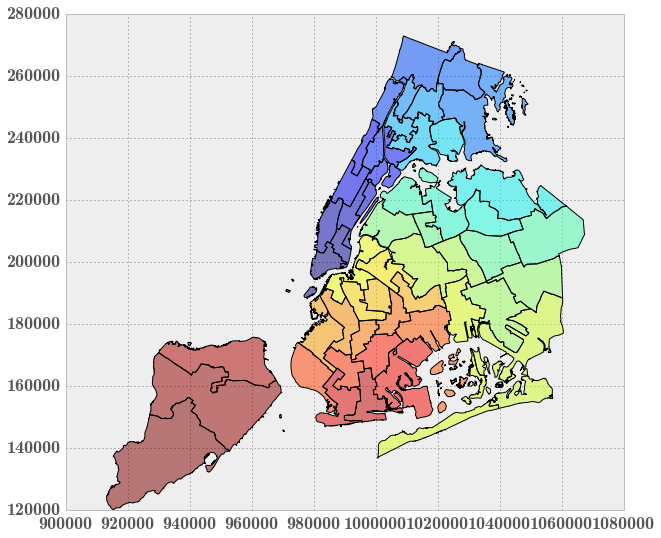

In [5]:
ccdist.plot(column='CounDist')

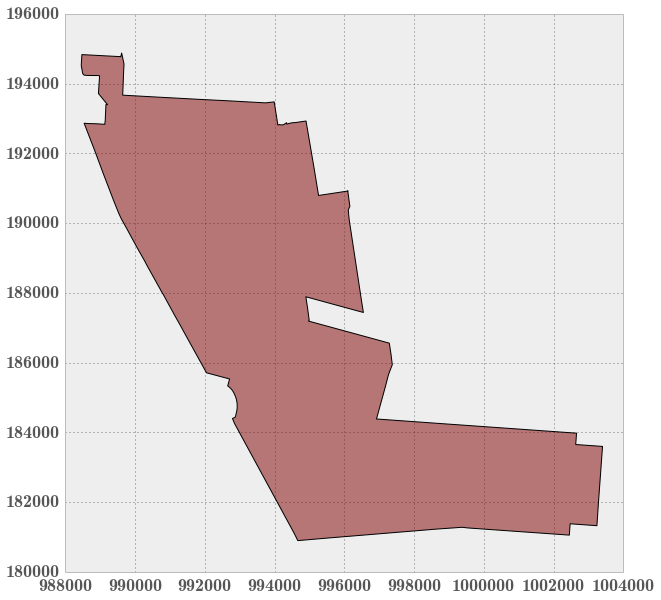

In [6]:
# district 35 
dist35=ccdist[ccdist.CounDist.isin([35])]
dist35.plot()

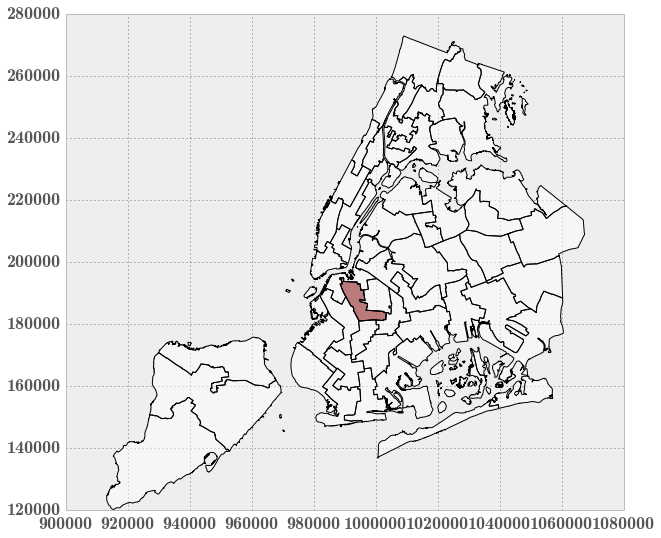

In [21]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ccdist.plot(ax=ax,color='white')
dist35.plot(ax=ax)

### Read in Brooklyn's MapPLUTO
has tax lot level shapefiles and PLUTO information for Brooklyn
Because of the complexity of the proprietary ESRI format, Geopandas (which is built with GDAL) can only read in one layer at a time. By default this is the first layer, but it can also be specified.

In [7]:
# using MapPluto find all BBLs within boarders
# read in brooklyn's map pluto
mappluto = gpd.read_file('data/BrooklynPluto/',layer='BKMapPLUTO')
print mappluto.shape
mappluto.head()

(276930, 90)


,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1081 EAST 12 STREET,R5,None,2,35107.0,91336.0,3.067140e+09,2112,...,0,1931,None,11230,R5,None,None,None,22d,"POLYGON ((994429.5163999945 166222.5835999995,..."
1,3.035210e+09,10/23/1996,157 CHESTER STREET,C4-3,None,2,16827.0,24718.0,3.035210e+09,2955,...,0,1995,None,11212,C4-3,None,None,None,17d,"POLYGON ((1008998.082800001 182627.6992000043,..."
2,0.000000e+00,None,65 EAST 95 STREET,R6,None,2,12291.0,64350.0,3.045980e+09,3502,...,0,1930,None,11212,R6,None,None,None,17b,"POLYGON ((1004889.778200001 181247.4655999988,..."
3,0.000000e+00,None,156 MOFFAT STREET,R6,None,2,4716.0,17464.0,3.034460e+09,2160,...,0,1910,None,11207,R6,None,None,None,17c,"POLYGON ((1010170.660400003 189517.8780000061,..."
4,0.000000e+00,None,2228 79 STREET,R5,None,2,7070.0,29859.0,3.062770e+09,1442,...,0,1940,None,11214,R5,None,None,None,22d,"POLYGON ((987316.2714000046 159814.2085999995,..."


In [8]:
print mappluto.crs
print ccdist.crs

{u'lon_0': -74, u'datum': u'NAD83', u'y_0': 0, u'no_defs': True, u'proj': u'lcc', u'x_0': 300000, u'units': u'us-ft', u'lat_2': 41.03333333333333, u'lat_1': 40.66666666666666, u'lat_0': 40.16666666666666}
{u'lon_0': -74, u'datum': u'NAD83', u'y_0': 0, u'no_defs': True, u'proj': u'lcc', u'x_0': 300000, u'units': u'us-ft', u'lat_2': 41.03333333333333, u'lat_1': 40.66666666666666, u'lat_0': 40.16666666666666}


If the coordinate reference systems (CRS) didn't match, we would have to translate one into the other before doing a spacial join. Otherwise sjoin will give a warning message. Luckily they already match.

### Spacial joins
Geopandas spacial join (or sjoin) has three options: intersects, within, and contains 
+ intersects: when the two polygons intersect or touch each other in any manner. 
+ within: when the first polygon is contained within the second
+ countains: when the first polygon contains the second (this is identical to within but with the order switched)

The resulting sjoin dataframe takes the geometry from the first dataframe listed. (mappluto in the case below)

In [9]:
dist35lots = sjoin(mappluto,dist35,how='inner',op='intersects')
print dist35lots.shape
dist35lots.head()

(11987, 94)


,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry,index_right,CounDist,Shape_Area,Shape_Leng
34,0.0,None,1208 CARROLL STREET,R6,None,2,20637.0,34934.0,3.012900e+09,3372,...,R6,None,None,None,17b,"POLYGON ((998168.7370000035 182300.8014000058,...",4,35,8.150918e+07,57090.335714
37,0.0,None,1108 LINCOLN PLACE,C2-3/R6,None,2,10411.0,24064.0,3.012650e+09,2128,...,R6,None,None,None,17b,"POLYGON ((1000924.0792 183446.5778000057, 1000...",4,35,8.150918e+07,57090.335714
47,0.0,None,10 GRAND AVENUE,M1-2,None,2,90000.0,2635650.0,3.018770e+09,58905,...,M1-2,None,None,None,12d,"POLYGON ((993994.2660000026 193252.9912, 99389...",4,35,8.150918e+07,57090.335714
50,0.0,None,659 ST JOHNS PLACE,R5B,None,2,7275.0,15839.0,3.012450e+09,1294,...,R5B,None,None,None,17a,"POLYGON ((996406.7613999993 184362.7041999996,...",4,35,8.150918e+07,57090.335714
93,0.0,None,253 KINGSTON AVENUE,C1-3/R6,None,2,1524.0,83539.0,3.012580e+09,3689,...,R6,None,None,None,17b,"POLYGON ((1000441.2984 183756.265200004, 10004...",4,35,8.150918e+07,57090.335714


In [10]:
dist35lots.groupby(['Council','CounDist']).count()[['BBL']]

,,BBL
Council,CounDist,
0,35,18
33,35,3
35,35,11966


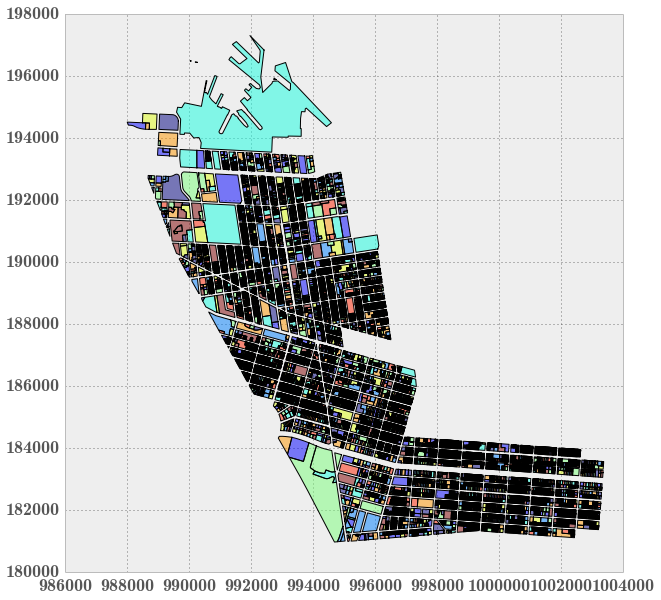

In [11]:
dist35lots.plot()

Because we used "intersects" in the sjoin, there are lots thattouch the boundary of the council district, but extend beyond it.

We can do the same thing, but this time using "within" and see the difference.

In [12]:
dist35lots = sjoin(mappluto,dist35,how='inner',op='within')
print dist35lots.shape
dist35lots.head()

(11984, 94)


,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry,index_right,CounDist,Shape_Area,Shape_Leng
260998,0.000000e+00,None,66 CLIFTON PLACE,R6B,None,2,5695.0,23228.0,3.019520e+09,2700,...,R6B,None,None,None,16c,"POLYGON ((994822.8884000033 189767.7176000029,...",4,35,8.150918e+07,57090.335714
143450,0.000000e+00,None,230 GREENE AVENUE,R6B,None,2,4296.0,17749.0,3.019660e+09,2856,...,R6B,None,None,None,16c,"POLYGON ((994826.6563999951 189496.8700000048,...",4,35,8.150918e+07,57090.335714
233655,3.019660e+09,03/23/2015,11 LEXINGTON AVENUE,R6B,None,2,8615.0,88350.0,3.019660e+09,2858,...,R6B,None,None,None,16c,"POLYGON ((994831.1042000055 189392.5022000074,...",4,35,8.150918e+07,57090.335714
82954,0.000000e+00,None,68 CLIFTON PLACE,R6B,None,2,12939.0,57459.0,3.019520e+09,3059,...,R6B,None,None,None,16c,"POLYGON ((994842.1622000039 189770.6816000044,...",4,35,8.150918e+07,57090.335714
119682,0.000000e+00,None,232 GREENE AVENUE,R6B,None,2,5375.0,16420.0,3.019660e+09,2144,...,R6B,None,None,None,16c,"POLYGON ((994844.6376000047 189499.5833999962,...",4,35,8.150918e+07,57090.335714


In [13]:
dist35lots.groupby(['Council','CounDist']).count()[['BBL']]

,,BBL
Council,CounDist,
0,35,18
35,35,11966


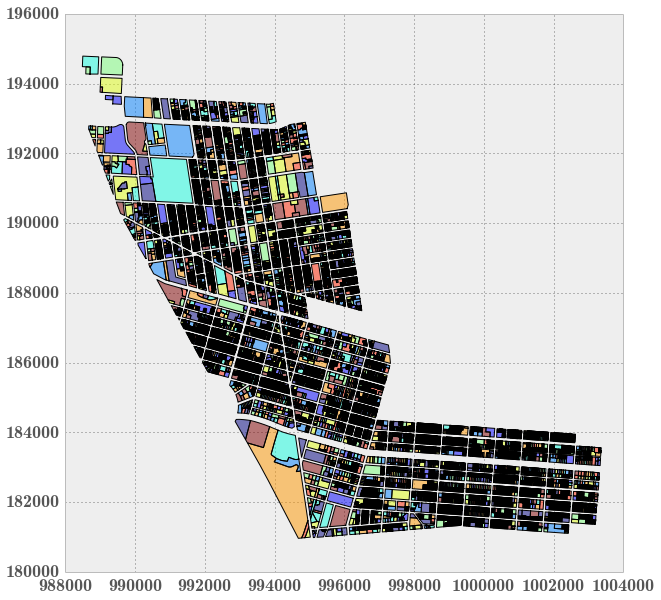

In [14]:
dist35lots.plot()

Reversing the order of the dataframes and using "contains" instead of "within" gives back the same number of lots. But this time the geometry is that of the city council district, so it will be exactly the same in every row. The lot level geometry is lost.

In [15]:
dist35lots = sjoin(dist35,mappluto,how='inner',op='contains')
print dist35lots.shape
dist35lots.head()

(11984, 94)


,CounDist,Shape_Area,Shape_Leng,geometry,index_right,APPBBL,APPDate,Address,AllZoning1,AllZoning2,...,YearAlter1,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap
4,35,8.150918e+07,57090.335714,"POLYGON ((996099.1724243164 190917.5881958008,...",260998,0.000000e+00,None,66 CLIFTON PLACE,R6B,None,...,0,0,1899,None,11238,R6B,None,None,None,16c
4,35,8.150918e+07,57090.335714,"POLYGON ((996099.1724243164 190917.5881958008,...",143450,0.000000e+00,None,230 GREENE AVENUE,R6B,None,...,0,0,1910,None,11238,R6B,None,None,None,16c
4,35,8.150918e+07,57090.335714,"POLYGON ((996099.1724243164 190917.5881958008,...",233655,3.019660e+09,03/23/2015,11 LEXINGTON AVENUE,R6B,None,...,0,0,2013,None,11238,R6B,None,None,None,16c
4,35,8.150918e+07,57090.335714,"POLYGON ((996099.1724243164 190917.5881958008,...",82954,0.000000e+00,None,68 CLIFTON PLACE,R6B,None,...,2004,0,1905,None,11238,R6B,None,None,None,16c
4,35,8.150918e+07,57090.335714,"POLYGON ((996099.1724243164 190917.5881958008,...",119682,0.000000e+00,None,232 GREENE AVENUE,R6B,None,...,0,0,1901,None,11238,R6B,None,None,None,16c


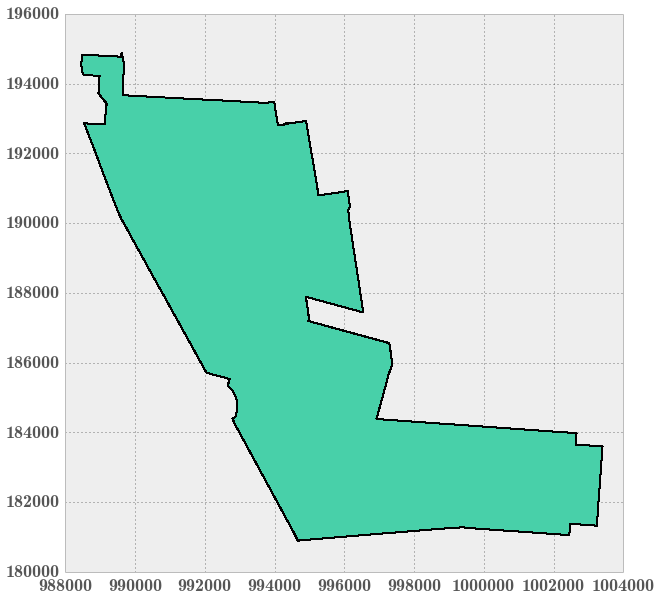

In [16]:
dist35lots.plot()

In [17]:
?sjoin